In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
!pip install -q keras

In [3]:
!rm -r *
!git clone https://github.com/prabhunithingollapudi007/HandSignClassification.git

Cloning into 'HandSignClassification'...
remote: Enumerating objects: 371, done.
remote: Counting objects: 100% (371/371), done.
remote: Compressing objects: 100% (355/355), done.
remote: Total 371 (delta 12), reused 368 (delta 12), pack-reused 0
Receiving objects: 100% (371/371), 15.20 MiB | 15.88 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [0]:
from glob import glob
from sklearn.model_selection import train_test_split

In [0]:
from glob import glob

from sklearn.model_selection import train_test_split

zeros = glob('HandSignClassification/Images/rgb/train/rgb_0/*.jpg')
ones = glob('HandSignClassification/Images/rgb/train/rgb_1/*.jpg')
twos = glob('HandSignClassification/Images/rgb/train/rgb_2/*.jpg')
threes = glob('HandSignClassification/Images/rgb/train/rgb_3/*.jpg')
fours = glob('HandSignClassification/Images/rgb/train/rgb_4/*.jpg')
fives = glob('HandSignClassification/Images/rgb/train/rgb_5/*.jpg')
sixes = glob('HandSignClassification/Images/rgb/train/rgb_6/*.jpg')
sevens = glob('HandSignClassification/Images/rgb/train/rgb_7/*.jpg')
eights = glob('HandSignClassification/Images/rgb/train/rgb_8/*.jpg')
nines = glob('HandSignClassification/Images/rgb/train/rgb_9/*.jpg')

In [0]:
zeros_train, zeros_test = train_test_split(zeros, test_size=0.2)

ones_train, ones_test = train_test_split(ones, test_size=0.2)
twos_train, twos_test = train_test_split(twos, test_size=0.2)
threes_train, threes_test = train_test_split(threes, test_size=0.2)

fours_train, fours_test = train_test_split(fours, test_size=0.2)
fives_train, fives_test = train_test_split(fives, test_size=0.2)
sixes_train, sixes_test = train_test_split(sixes, test_size=0.2)

sevens_train, sevens_test = train_test_split(sevens, test_size=0.2)
eights_train, eights_test = train_test_split(eights, test_size=0.2)
nines_train, nines_test = train_test_split(nines, test_size=0.2)

In [7]:
print(nines_train)

['HandSignClassification/Images/rgb/train/rgb_9/rgb_image_13.jpg', 'HandSignClassification/Images/rgb/train/rgb_9/rgb_image_6.jpg', 'HandSignClassification/Images/rgb/train/rgb_9/rgb_image_1.jpg', 'HandSignClassification/Images/rgb/train/rgb_9/rgb_image_3.jpg', 'HandSignClassification/Images/rgb/train/rgb_9/rgb_image_4.jpg', 'HandSignClassification/Images/rgb/train/rgb_9/rgb_image_2.jpg', 'HandSignClassification/Images/rgb/train/rgb_9/rgb_image_15.jpg', 'HandSignClassification/Images/rgb/train/rgb_9/rgb_image_11.jpg', 'HandSignClassification/Images/rgb/train/rgb_9/rgb_image_9.jpg', 'HandSignClassification/Images/rgb/train/rgb_9/rgb_image_8.jpg', 'HandSignClassification/Images/rgb/train/rgb_9/rgb_image_12.jpg', 'HandSignClassification/Images/rgb/train/rgb_9/rgb_image_5.jpg']


In [0]:
TRAIN_DIR = 'HandSignClassification/Images/rgb/train'
TEST_DIR = 'test'

!mkdir test

!mkdir test/Zero
files = ' '.join(zeros_test)
!mv -t test/Zero $files

!mkdir test/One
files = ' '.join(ones_test)
!mv -t test/One $files

!mkdir test/Two
files = ' '.join(twos_test)
!mv -t test/Two $files

!mkdir test/Three
files = ' '.join(threes_test)
!mv -t test/Three $files

!mkdir test/Four
files = ' '.join(fours_test)
!mv -t test/Four $files

!mkdir test/Five
files = ' '.join(fives_test)
!mv -t test/Five $files

!mkdir test/Six
files = ' '.join(sixes_test)
!mv -t test/Six $files

!mkdir test/Seven
files = ' '.join(sevens_test)
!mv -t test/Seven $files

!mkdir test/Eight
files = ' '.join(eights_test)
!mv -t test/Eight $files

!mkdir test/Nine
files = ' '.join(nines_test)
!mv -t test/Nine $files

In [0]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


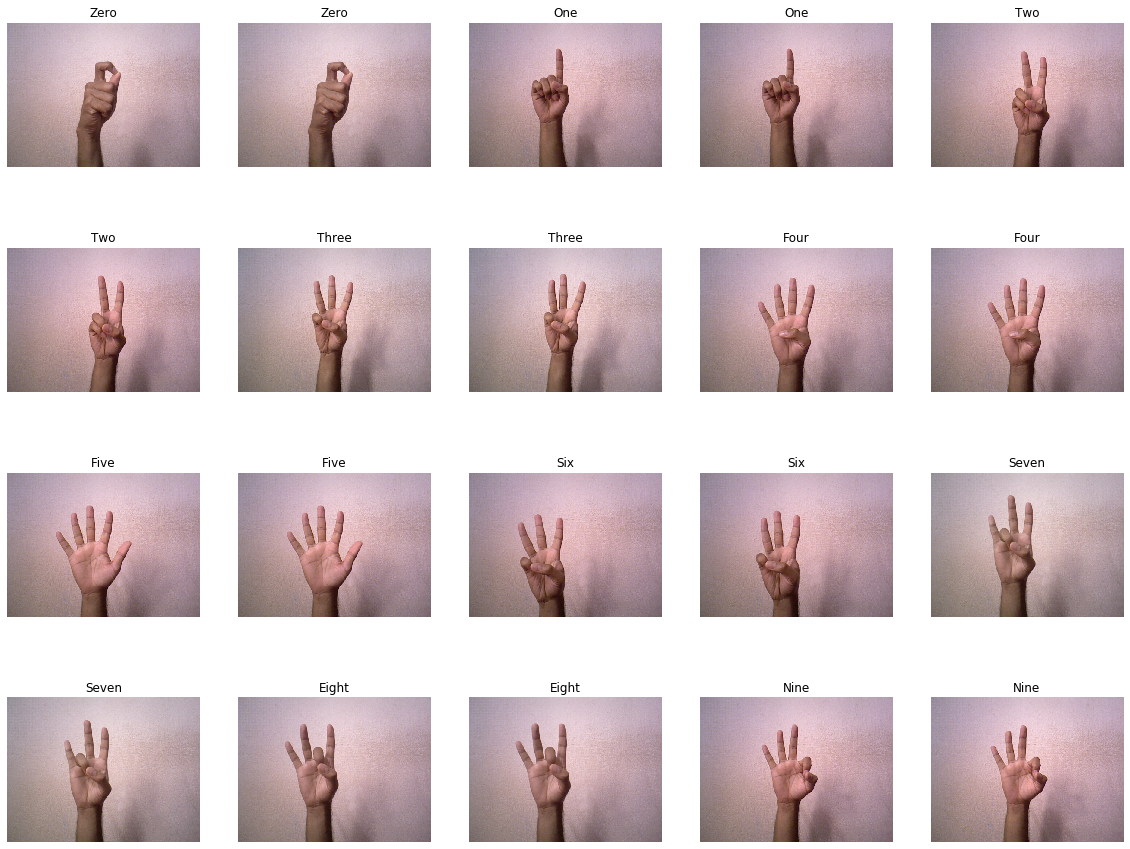

In [10]:
zeros = np.random.choice(zeros_train, 2)

ones = np.random.choice(ones_train, 2)
twos = np.random.choice(twos_train, 2)
threes = np.random.choice(threes_train, 2)

fours = np.random.choice(fours_train, 2)
fives = np.random.choice(fives_train, 2)
sixes = np.random.choice(sixes_train, 2)

sevens = np.random.choice(sevens_train, 2)
eights = np.random.choice(eights_train, 2)
nines = np.random.choice(nines_train, 2)

data = np.concatenate((zeros, ones, twos, threes, fours, fives, sixes, sevens, eights, nines))
labels = 2* ['Zero'] + 2 * ['One'] + 2 *['Two'] + 2 *['Three'] + 2 *['Four'] + 2 *['Five'] + 2 *['Six'] + 2 *['Seven'] + 2 *['Eight'] + 2 *['Nine']

N, R, C = 25, 5, 5
plt.figure(figsize=(20, 20))
for k, (src, label) in enumerate(zip(data, labels)):
    im = Image.open(src).convert('RGB')
    plt.subplot(R, C, k+1)
    plt.title(label)
    plt.imshow(np.asarray(im))
    plt.axis('off')

In [11]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications.inception_v3 import InceptionV3, preprocess_input

CLASSES = 10
    
# setup model
base_model = InceptionV3(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)
predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
   
# transfer learning
for layer in base_model.layers:
    layer.trainable = False
      
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

Using TensorFlow backend.







87916544/87910968 [==============================] - 4s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [12]:
from keras.preprocessing.image import ImageDataGenerator

WIDTH = 640
HEIGHT = 480
BATCH_SIZE = 32

# data prep

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
'''
train_datagen = ImageDataGenerator(
featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, 
samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, 
height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, 
fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, 
data_format='channels_last', validation_split=0.0, dtype='float32')

validation_datagen = ImageDataGenerator(
featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, 
samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, 
height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, 
fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, 
data_format='channels_last', validation_split=0.0, dtype='float32')

'''

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
		batch_size=BATCH_SIZE,
		class_mode='categorical')
    
validation_generator = validation_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 120 images belonging to 10 classes.
Found 30 images belonging to 10 classes.


In [0]:
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(12, 9))
for k, (img, lbl) in enumerate(zip(x_batch, y_batch)):
    plt.subplot(4, 8, k+1)
    plt.imshow((img + 1) / 2)
    plt.axis('off')

In [14]:
EPOCHS = 7
BATCH_SIZE = 32
STEPS_PER_EPOCH = 320
VALIDATION_STEPS = 64

MODEL_FILE = 'classifier.model'

history = model.fit_generator(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS)
  
model.save(MODEL_FILE)

Epoch 1/7
320/320 [==============================] - 814s 3s/step - loss: 1.8545 - acc: 0.3827 - val_loss: 2.7259 - val_acc: 0.0469
Epoch 2/7
320/320 [==============================] - 808s 3s/step - loss: 1.2534 - acc: 0.6515 - val_loss: 3.0732 - val_acc: 0.0531
Epoch 3/7
320/320 [==============================] - 806s 3s/step - loss: 0.9709 - acc: 0.7399 - val_loss: 3.4653 - val_acc: 0.0568
Epoch 4/7
320/320 [==============================] - 792s 2s/step - loss: 0.8269 - acc: 0.7747 - val_loss: 3.9197 - val_acc: 0.0505
Epoch 5/7
320/320 [==============================] - 788s 2s/step - loss: 0.7261 - acc: 0.7969 - val_loss: 4.0097 - val_acc: 0.0453
Epoch 6/7
320/320 [==============================] - 798s 2s/step - loss: 0.6951 - acc: 0.7961 - val_loss: 4.2583 - val_acc: 0.0458
Epoch 7/7
320/320 [==============================] - 813s 3s/step - loss: 0.6185 - acc: 0.8175 - val_loss: 4.5061 - val_acc: 0.0542


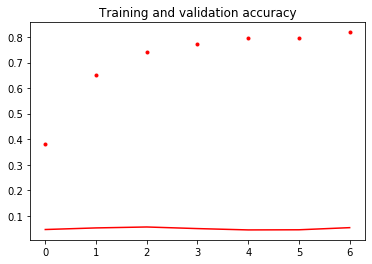

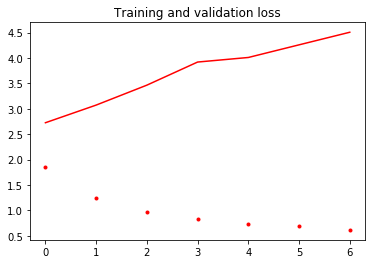

In [15]:
def plot_training(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  
  plt.plot(epochs, acc, 'r.')
  plt.plot(epochs, val_acc, 'r')
  plt.title('Training and validation accuracy')
  
  plt.figure()
  plt.plot(epochs, loss, 'r.')
  plt.plot(epochs, val_loss, 'r-')
  plt.title('Training and validation loss')
  plt.show()
  
plot_training(history)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from keras.preprocessing import image
from keras.models import load_model


def predict(model, img):
    """Run model prediction on image
    Args:
        model: keras model
        img: PIL format image
    Returns:
        list of predicted labels and their probabilities 
    """
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return preds[0]


def plot_preds(img, preds):
    """Displays image and the top-n predicted probabilities in a bar graph
    Args:
        preds: list of predicted labels and their probabilities
    """
    labels = ("one", "two")
    gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])
    plt.figure(figsize=(8,8))
    plt.subplot(gs[0])
    plt.imshow(np.asarray(img))
    plt.subplot(gs[1])
    plt.barh([0, 1], preds, alpha=0.5)
    plt.yticks([0, 1], labels)
    plt.xlabel('Probability')
    plt.xlim(0, 1)
    plt.tight_layout()

In [0]:
model = load_model(MODEL_FILE)
#model.summary()

In [0]:
  from sklearn.metrics import confusion_matrix

In [0]:
outputs_test = model.predict_generator(validation_generator)

In [0]:
print(outputs_test)

In [0]:
import numpy

In [30]:
predictions = []
for array in outputs_test:
  temp = [x for x in array]
  max_value = max(temp)
  print("max value:%f, %d" %(max_value,temp.index(max_value) + 1))
  predictions.append(temp.index(max_value) + 1)

max value:0.605468, 3
max value:0.367225, 10
max value:0.438750, 6
max value:0.559902, 4
max value:0.464106, 3
max value:0.750653, 1
max value:0.373445, 4
max value:0.479865, 3
max value:0.330102, 10
max value:0.317098, 3
max value:0.499624, 3
max value:0.327637, 4
max value:0.385882, 6
max value:0.468537, 10
max value:0.415703, 10
max value:0.380779, 3
max value:0.771952, 10
max value:0.311028, 10
max value:0.386451, 3
max value:0.690303, 3
max value:0.463476, 4
max value:0.384626, 10
max value:0.396040, 10
max value:0.504742, 4
max value:0.346677, 6
max value:0.305584, 6
max value:0.332244, 6
max value:0.675543, 4
max value:0.682409, 4
max value:0.934971, 4


In [0]:
true_values = [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9]

In [32]:
confusion_matrix(true_values, predictions)

array([[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2],
       [0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2],
       [0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [33]:
from sklearn.metrics import classification_report
print(classification_report(true_values, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      0.33      0.50         3
           2       0.00      0.00      0.00         3
           3       0.25      0.67      0.36         3
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         0

    accuracy                           0.10        30
   macro avg       0.11      0.09      0.08        30
weighted avg       0.12      0.10      0.09        30



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


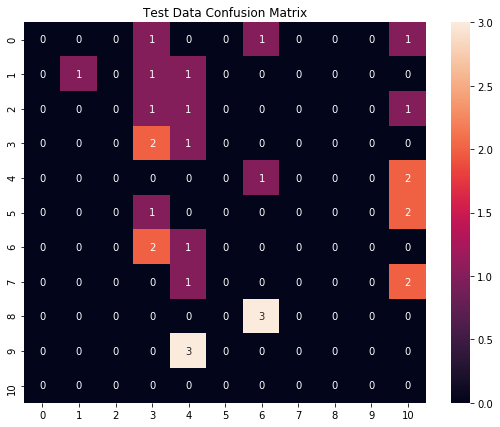

In [34]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(true_values, predictions)
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 7))
plt.title("Test Data Confusion Matrix")
sns.heatmap(cm, annot=True, annot_kws={"size": 10})

In [0]:
input_predictions = model.predict_generator(train_generator)

In [0]:
predictions = []
for array in input_predictions:
  temp = [x for x in array]
  max_value = max(temp)
  #print("max value:%f, %d" %(max_value,temp.index(max_value) + 1))
  predictions.append(temp.index(max_value) + 1)

In [0]:
true_values = []
for i in range(0, 10):
  for j in range(12):
    true_values.append(i)

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(true_values, predictions)

array([[0, 0, 0, 4, 3, 0, 2, 0, 0, 0, 3],
       [0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 7],
       [0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 7],
       [0, 0, 0, 4, 5, 0, 1, 0, 0, 0, 2],
       [0, 0, 0, 5, 3, 0, 3, 0, 0, 0, 1],
       [0, 1, 0, 0, 5, 0, 3, 0, 0, 0, 3],
       [0, 1, 0, 2, 3, 0, 2, 0, 0, 0, 4],
       [0, 2, 0, 3, 2, 0, 4, 0, 0, 0, 1],
       [0, 0, 0, 2, 4, 0, 2, 0, 0, 0, 4],
       [0, 0, 0, 9, 1, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

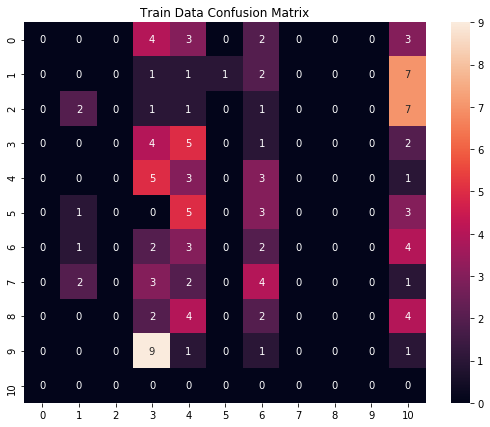

In [39]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(true_values, predictions)
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 7))
plt.title("Train Data Confusion Matrix")
sns.heatmap(cm, annot=True, annot_kws={"size": 10})

In [40]:
from sklearn.metrics import classification_report
print(classification_report(true_values, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00        12
           3       0.13      0.33      0.19        12
           4       0.11      0.25      0.15        12
           5       0.00      0.00      0.00        12
           6       0.10      0.17      0.12        12
           7       0.00      0.00      0.00        12
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00        12
          10       0.00      0.00      0.00         0

    accuracy                           0.07       120
   macro avg       0.03      0.07      0.04       120
weighted avg       0.03      0.07      0.05       120



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
TEMP_TRAIN_DIR = 'HandSignClassification/Images/rgb/train'

In [80]:
temp_train_generator.reset()
temp_train_datagen = ImageDataGenerator()
temp_train_generator = temp_train_datagen.flow_from_directory(
    TEMP_TRAIN_DIR, target_size=(640, 480))

Found 120 images belonging to 10 classes.


In [0]:
temp_preds = model.predict_generator(temp_train_generator)

In [70]:
print(temp_preds.size)

1200


In [0]:
train_predicted_class_indices=np.argmax(temp_preds,axis=1)

In [0]:
temp_labels = (temp_train_generator.class_indices)

In [0]:
temp_labels = dict((v,k) for k,v in temp_labels.items())
temp_predictions = [temp_labels[k] for k in train_predicted_class_indices]

In [89]:
from PIL import Image
print(temp_predictions)

['rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 'rgb_3', 

In [0]:
def predict(model, img):
    """Run model prediction on image
    Args:
        model: keras model
        img: PIL format image
    Returns:
        list of predicted labels and their probabilities 
    """
    img = Image.open(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return np.argmax(preds[0])

In [103]:
temp_img = 'HandSignClassification/Images/rgb/train/rgb_1/rgb_image_11.jpg'

print(predict(model, temp_img))

2


In [0]:

zeros = glob('HandSignClassification/Images/rgb/train/rgb_0/*.jpg')
ones = glob('HandSignClassification/Images/rgb/train/rgb_1/*.jpg')
twos = glob('HandSignClassification/Images/rgb/train/rgb_2/*.jpg')
threes = glob('HandSignClassification/Images/rgb/train/rgb_3/*.jpg')
fours = glob('HandSignClassification/Images/rgb/train/rgb_4/*.jpg')
fives = glob('HandSignClassification/Images/rgb/train/rgb_5/*.jpg')
sixes = glob('HandSignClassification/Images/rgb/train/rgb_6/*.jpg')
sevens = glob('HandSignClassification/Images/rgb/train/rgb_7/*.jpg')
eights = glob('HandSignClassification/Images/rgb/train/rgb_8/*.jpg')
nines = glob('HandSignClassification/Images/rgb/train/rgb_9/*.jpg')

In [141]:
my_pred = []
train_folders = [zeros, ones, twos, threes, fours, fives,
                 sixes, sevens, eights, nines]
for folder in train_folders:
  temp_count = 0
  for temp_img in folder:
    temp_count += 1
    my_pred.append(predict(model, temp_img))
  print(temp_count)


12
12
12
12
12
12
12
12
12
12
120


In [0]:
my_true_values = []
for i in range(0, 10):
  for j in range(12):
    my_true_values.append(i)

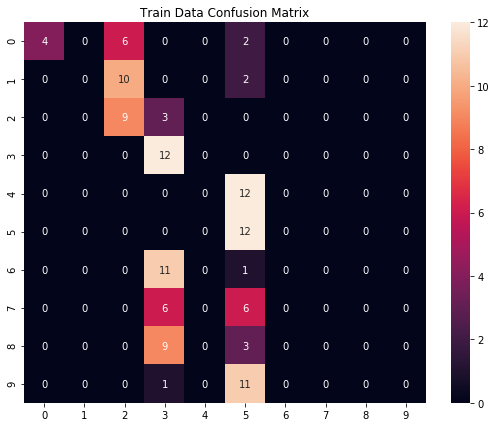

In [143]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(my_true_values, my_pred)
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 7))
plt.title("Train Data Confusion Matrix")
sns.heatmap(cm, annot=True, annot_kws={"size": 10})